# Import packeges

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Hourly weather data of shillong city

In [10]:
df = pd.read_excel(r'C:\Users\SAI PRADEEP KATAKAM\Desktop\DS project\Weather_prediction-main\meteo_data.xlsx')
df.head(20)

location                 shillong                  shillong.1  \
0                   lat                  25.5788                     25.5788   
1                   lon                  91.8933                     91.8933   
2                   asl                     1525                        1525   
3              variable              Temperature           Relative Humidity   
4                  unit                       °C                           %   
5                 level  2 m elevation corrected                         2 m   
6            resolution                   hourly                      hourly   
7           aggregation                     None                        None   
8             timestamp     Shillong Temperature  Shillong Relative Humidity   
9   2021-01-15 00:00:00                -0.548782                          66   
10  2021-01-15 01:00:00                -0.638782                          58   
11  2021-01-15 02:00:00                -0.778782                          50   
12  2021-01-15 03:00:00                -0.838782                          42   
13  2021-01-15 04:00:00                -0.928782                          37   
14  2021-01-15 05:00:00                -0.968782                          34   
15  2021-01-15 06:00:00                -0.998782                          33   
16  2021-01-15 07:00:00                -0.938782                          31   
17  2021-01-15 08:00:00                -0.898782                          29   
18  2021-01-15 09:00:00                 0.601218                          27   
19  2021-01-15 10:00:00                  4.24122                          29   

             shillong.2               shillong.3  
0               25.5788                  25.5788  
1               91.8933                  91.8933  
2                  1525                     1525  
3            Wind Speed           Wind Direction  
4                  km/h                        °  
5                  10 m                     10 m  
6                hourly                   hourly  
7                  None                     None  
8   Shillong Wind Speed  Shillong Wind Direction  
9                 12.24                      270  
10                 12.6                      270  
11              12.2453                  268.315  
12              12.6051                  268.363  
13              12.2612                  266.634  
14              12.2612                  266.634  
15              11.9018                  266.532  
16              11.1832                  266.309  
17              10.4462                  268.025  
18                    9                      270  
19              5.41199                  273.814

# Remove useless column

In [11]:
newdata = df.iloc[9:,:]
newdata.head()

location  shillong shillong.1 shillong.2 shillong.3
9   2021-01-15 00:00:00 -0.548782         66      12.24        270
10  2021-01-15 01:00:00 -0.638782         58       12.6        270
11  2021-01-15 02:00:00 -0.778782         50    12.2453    268.315
12  2021-01-15 03:00:00 -0.838782         42    12.6051    268.363
13  2021-01-15 04:00:00 -0.928782         37    12.2612    266.634

# Rename columns

In [21]:
new_data = newdata.rename(columns={'location': 'datetime', 'shillong': 'temperature', 'shillong.1' : 'humidity', 'shillong.2' : 'wind_speed', 'shillong.3' : 'wind_direction'})
new_data.head()

datetime temperature humidity wind_speed wind_direction
9   2021-01-15 00:00:00   -0.548782       66      12.24            270
10  2021-01-15 01:00:00   -0.638782       58       12.6            270
11  2021-01-15 02:00:00   -0.778782       50    12.2453        268.315
12  2021-01-15 03:00:00   -0.838782       42    12.6051        268.363
13  2021-01-15 04:00:00   -0.928782       37    12.2612        266.634

In [22]:
new_data.shape

(360, 5)

So we have a dataset that contains 360 rows of data that represent 15 days of hourly weather data of Modelt city, and 5 columns which are : date, tempreture, humidity, wind speed and wind direction.

# Give datetime as index of data

In [23]:
new_data.index = pd.to_datetime(new_data.datetime)
new_data.head()

datetime temperature humidity wind_speed  \
datetime                                                                   
2021-01-15 00:00:00  2021-01-15 00:00:00   -0.548782       66      12.24   
2021-01-15 01:00:00  2021-01-15 01:00:00   -0.638782       58       12.6   
2021-01-15 02:00:00  2021-01-15 02:00:00   -0.778782       50    12.2453   
2021-01-15 03:00:00  2021-01-15 03:00:00   -0.838782       42    12.6051   
2021-01-15 04:00:00  2021-01-15 04:00:00   -0.928782       37    12.2612   

                    wind_direction  
datetime                            
2021-01-15 00:00:00            270  
2021-01-15 01:00:00            270  
2021-01-15 02:00:00        268.315  
2021-01-15 03:00:00        268.363  
2021-01-15 04:00:00        266.634

In [24]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,6)})

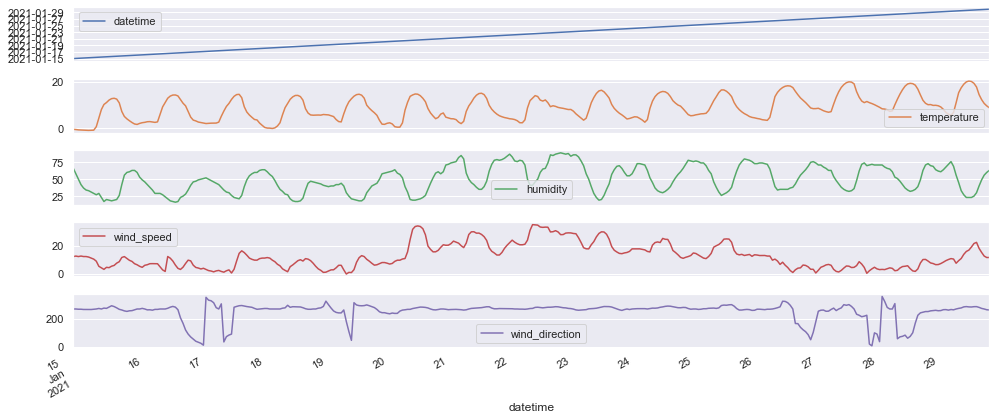

In [25]:
new_data.plot(subplots=True)

plt.tight_layout()
plt.show()

# Temperature graph

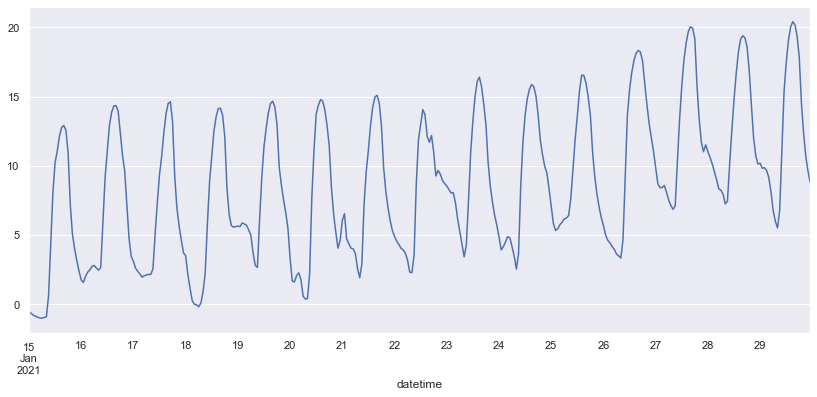

In [26]:
new_data['temperature'].plot()

# Humidity graph

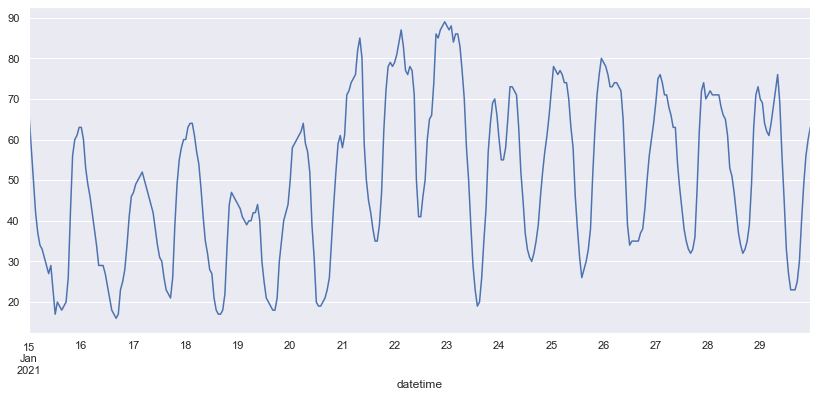

In [27]:
new_data['humidity'].plot()

# Wind speed graph

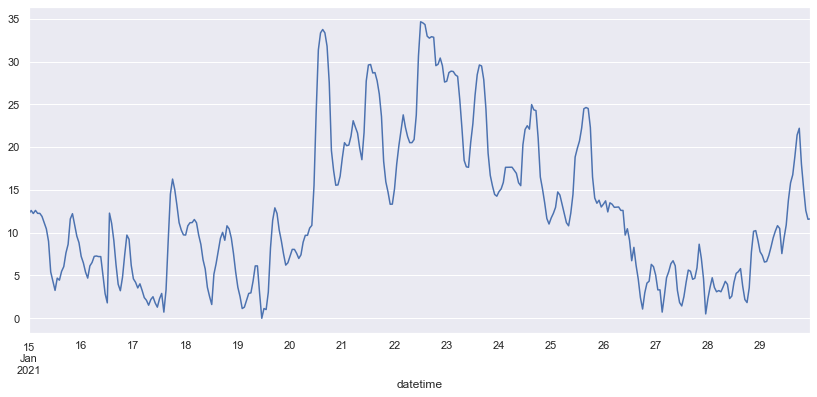

In [28]:
new_data['wind_speed'].plot()

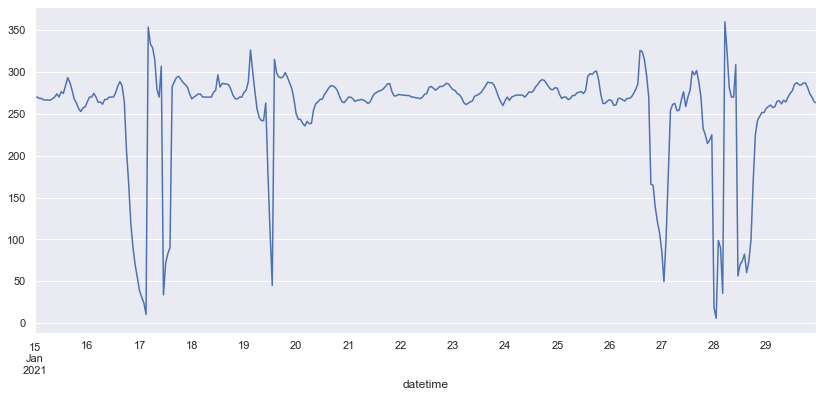

In [29]:
new_data['wind_direction'].plot()

# Training data (temperature)

Next we w'll predict the temperature of 3 days, so we need to select just temperature column as we did below

In [30]:

#working_data = new_data.resample('D').mean()
training_set = new_data.iloc[:,1:2]
training_set.head()

temperature
datetime                       
2021-01-15 00:00:00   -0.548782
2021-01-15 01:00:00   -0.638782
2021-01-15 02:00:00   -0.778782
2021-01-15 03:00:00   -0.838782
2021-01-15 04:00:00   -0.928782

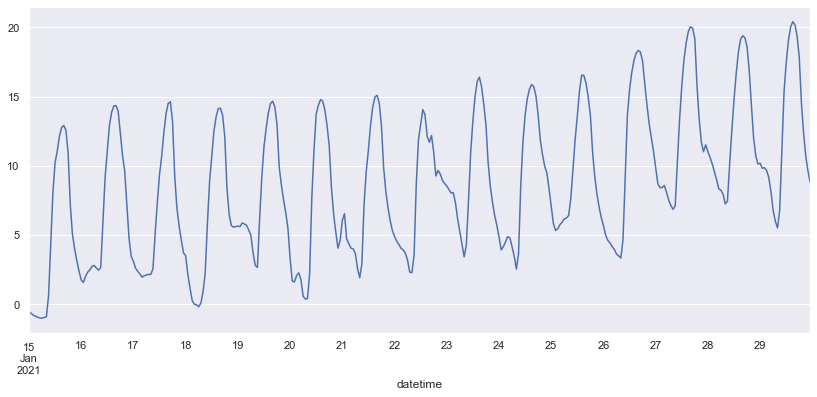

In [31]:
training_set['temperature'].plot()

In [32]:
training_set.shape

(360, 1)

# Data transformation

Here we will transform temperature values to values between 0 and 1 in order to simplify numerical computing, 

In [33]:
from sklearn.preprocessing import MinMaxScaler
train = training_set.values
sc = MinMaxScaler(feature_range=(0,1))
train = sc.fit_transform(train)# transformation des donnees en des valeurs comprises entre 0 et 1
train

array([[0.02102804],
       [0.01682243],
       [0.01028037],
       [0.00747663],
       [0.00327103],
       [0.00140187],
       [0.        ],
       [0.00280374],
       [0.0046729 ],
       [0.07476636],
       [0.24485981],
       [0.4224299 ],
       [0.52476635],
       [0.56401869],
       [0.6135514 ],
       [0.64299065],
       [0.65046729],
       [0.63364486],
       [0.55747663],
       [0.38317756],
       [0.28224298],
       [0.23364487],
       [0.19485981],
       [0.1593458 ],
       [0.12943925],
       [0.12056075],
       [0.14158879],
       [0.15560748],
       [0.16308412],
       [0.17523365],
       [0.17803739],
       [0.16915888],
       [0.16214954],
       [0.17196261],
       [0.3271028 ],
       [0.47616822],
       [0.56214953],
       [0.65140187],
       [0.69485981],
       [0.71588785],
       [0.71728972],
       [0.69813084],
       [0.62336448],
       [0.55      ],
       [0.49672897],
       [0.38411214],
       [0.26869158],
       [0.208

Next we will create two lists X_train as a past values and y_train is the next values (to be explained)

In [34]:
X_train = []
y_train = []

for i in range (60,360):
    X_train.append(train[i-60:i])
    y_train.append(train[i])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train)
print('###############################')
print(y_train)
    

[[[0.02102804]
  [0.01682243]
  [0.01028037]
  ...
  [0.16728972]
  [0.2859813 ]
  [0.39158878]]

 [[0.01682243]
  [0.01028037]
  [0.00747663]
  ...
  [0.2859813 ]
  [0.39158878]
  [0.48504672]]

 [[0.01028037]
  [0.00747663]
  [0.00327103]
  ...
  [0.39158878]
  [0.48504672]
  [0.54626168]]

 ...

 [[0.37943925]
  [0.5317757 ]
  [0.67056074]
  ...
  [0.87897196]
  [0.72429906]
  [0.6224299 ]]

 [[0.5317757 ]
  [0.67056074]
  [0.78317757]
  ...
  [0.72429906]
  [0.6224299 ]
  [0.54579439]]

 [[0.67056074]
  [0.78317757]
  [0.87056084]
  ...
  [0.6224299 ]
  [0.54579439]
  [0.49672897]]]
###############################
[[0.48504672]
 [0.54626168]
 [0.6271028 ]
 [0.68971962]
 [0.72476635]
 [0.73037383]
 [0.66214953]
 [0.47803738]
 [0.37149532]
 [0.31121495]
 [0.26448597]
 [0.22102804]
 [0.21121496]
 [0.14859813]
 [0.10280374]
 [0.06028038]
 [0.04719626]
 [0.04579439]
 [0.03878505]
 [0.05093458]
 [0.08878505]
 [0.15373832]
 [0.317757  ]
 [0.46028037]
 [0.54485981]
 [0.62990654]
 [0.678971

In [35]:
print(X_train.shape)
print(y_train.shape)

(300, 60, 1)
(300, 1)


# The model

In [36]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential


model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['acc'])

In [37]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
10/10 [==============================] - 16s 192ms/step - loss: 0.1696 - acc: 0.0000e+000s - loss: 0.1948 - acc: 0.000
Epoch 2/50
10/10 [==============================] - 2s 181ms/step - loss: 0.0675 - acc: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 2s 183ms/step - loss: 0.0587 - acc: 0.0027
Epoch 4/50
10/10 [==============================] - 2s 183ms/step - loss: 0.0584 - acc: 0.0000e+00
Epoch 5/50
10/10 [==============================] - 2s 181ms/step - loss: 0.0584 - acc: 0.0013
Epoch 6/50
10/10 [==============================] - 2s 182ms/step - loss: 0.0548 - acc: 0.0044
Epoch 7/50
10/10 [==============================] - 2s 183ms/step - loss: 0.0472 - acc: 0.0000e+00
Epoch 8/50
10/10 [==============================] - 2s 182ms/step - loss: 0.0445 - acc: 0.0044
Epoch 9/50
10/10 [==============================] - 2s 183ms/step - loss: 0.0283 - acc: 0.0013
Epoch 10/50
10/10 [==============================] - 2s 181ms/step - loss: 0.0208 - acc: 6.0606e-0

# Testing

In [38]:
test_data = pd.read_excel(r'C:\Users\SAI PRADEEP KATAKAM\Desktop\DS project\Weather_prediction-main\meteo_test.xlsx')
test_data.head()

location     shillong         shillong.1  shillong.2      shillong.3
0       lat      25.5788            25.5788     25.5788         25.5788
1       lon      91.8933            91.8933     91.8933         91.8933
2       asl         1525               1525        1525            1525
3  variable  Temperature  Relative Humidity  Wind Speed  Wind Direction
4      unit           °C                  %        km/h               °

In [39]:
test_data = test_data.iloc[9:,:]
test_data.head()

location shillong shillong.1 shillong.2 shillong.3
9   2021-01-29 00:00:00  10.1912         70    7.77133    256.608
10  2021-01-29 01:00:00  9.83122         69    7.34259     258.69
11  2021-01-29 02:00:00  9.87122         64    6.56938    260.538
12  2021-01-29 03:00:00  9.67122         62    6.63807    257.471
13  2021-01-29 04:00:00  9.15122         61    7.34259     258.69

In [40]:
test_data = test_data.rename(columns={'location': 'datetime', 'shillong': 'temperature', 'shillong.1' : 'humidity', 'shillong.2' : 'wind_speed', 'shillong.3' : 'wind_direction'})
test_data.head()

datetime temperature humidity wind_speed wind_direction
9   2021-01-29 00:00:00     10.1912       70    7.77133        256.608
10  2021-01-29 01:00:00     9.83122       69    7.34259         258.69
11  2021-01-29 02:00:00     9.87122       64    6.56938        260.538
12  2021-01-29 03:00:00     9.67122       62    6.63807        257.471
13  2021-01-29 04:00:00     9.15122       61    7.34259         258.69

In [41]:
test_data.shape

(72, 5)

In [42]:
test_data.index = pd.to_datetime(test_data.datetime)
test_data.head()

datetime temperature humidity wind_speed  \
datetime                                                                   
2021-01-29 00:00:00  2021-01-29 00:00:00     10.1912       70    7.77133   
2021-01-29 01:00:00  2021-01-29 01:00:00     9.83122       69    7.34259   
2021-01-29 02:00:00  2021-01-29 02:00:00     9.87122       64    6.56938   
2021-01-29 03:00:00  2021-01-29 03:00:00     9.67122       62    6.63807   
2021-01-29 04:00:00  2021-01-29 04:00:00     9.15122       61    7.34259   

                    wind_direction  
datetime                            
2021-01-29 00:00:00        256.608  
2021-01-29 01:00:00         258.69  
2021-01-29 02:00:00        260.538  
2021-01-29 03:00:00        257.471  
2021-01-29 04:00:00         258.69

In [43]:
test_data = test_data.iloc[:,1:2]
test_data.head()

temperature
datetime                       
2021-01-29 00:00:00     10.1912
2021-01-29 01:00:00     9.83122
2021-01-29 02:00:00     9.87122
2021-01-29 03:00:00     9.67122
2021-01-29 04:00:00     9.15122

In [44]:
test_data.shape

(72, 1)

In [45]:
Df_Total = pd.concat((training_set[["temperature"]], test_data[["temperature"]]), axis=0)
Df_Total.shape

(432, 1)

In [46]:
Df_Total.head()

temperature
datetime                       
2021-01-15 00:00:00   -0.548782
2021-01-15 01:00:00   -0.638782
2021-01-15 02:00:00   -0.778782
2021-01-15 03:00:00   -0.838782
2021-01-15 04:00:00   -0.928782

In [47]:
Df = pd.concat((training_set[["temperature"]], test_data[["temperature"]]), axis=1)
Df.shape

(408, 2)

In [48]:
print(" \n\nCount total NaN in a DataFrame : ", 
       Df.isnull().sum().sum())

 

Count total NaN in a DataFrame :  384


In [49]:
inputs = Df_Total[len(Df_Total) - len(test_data) - 60:].values
inputs.shape

(132, 1)

In [50]:
inputs = sc.transform(inputs)

In [51]:
X_test = []
for i in range(60, 132):
    X_test.append(inputs[i-60:i])
X_test

[array([[0.78317757],
        [0.87056084],
        [0.92757019],
        [0.96635523],
        [0.98317766],
        [0.97803748],
        [0.94299075],
        [0.78411215],
        [0.67196261],
        [0.59439252],
        [0.56168224],
        [0.58504673],
        [0.56168224],
        [0.54299065],
        [0.52056074],
        [0.49392523],
        [0.467757  ],
        [0.43691588],
        [0.4317757 ],
        [0.41822429],
        [0.38551401],
        [0.39579439],
        [0.51915887],
        [0.63224299],
        [0.73551402],
        [0.82429906],
        [0.89626177],
        [0.94018701],
        [0.95280374],
        [0.94626173],
        [0.91588794],
        [0.83598131],
        [0.71915888],
        [0.60934579],
        [0.54859813],
        [0.52009345],
        [0.52289719],
        [0.50607476],
        [0.50794392],
        [0.49859813],
        [0.47429906],
        [0.42570093],
        [0.3635514 ],
        [0.32757009],
        [0.30467289],
        [0

In [52]:
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(72, 60, 1)

# Predict temperature values

In [53]:
pred = model.predict(X_test)

In [54]:
pred = sc.inverse_transform(pred)
pred

array([[10.844357 ],
       [10.55515  ],
       [10.376618 ],
       [10.209259 ],
       [ 9.95121  ],
       [ 9.50942  ],
       [ 8.848878 ],
       [ 8.1259365],
       [ 7.872748 ],
       [ 8.86751  ],
       [11.447767 ],
       [14.957535 ],
       [18.246174 ],
       [20.441982 ],
       [21.432608 ],
       [21.408716 ],
       [20.610373 ],
       [19.265411 ],
       [17.595934 ],
       [15.839427 ],
       [14.189601 ],
       [12.782678 ],
       [11.716864 ],
       [11.022141 ],
       [10.617231 ],
       [10.404436 ],
       [10.2778845],
       [10.124953 ],
       [ 9.827285 ],
       [ 9.280494 ],
       [ 8.467494 ],
       [ 7.6466837],
       [ 7.5834374],
       [ 9.190163 ],
       [12.420599 ],
       [16.1685   ],
       [19.260695 ],
       [21.162281 ],
       [21.863886 ],
       [21.582363 ],
       [20.553663 ],
       [19.001083 ],
       [17.13892  ],
       [15.185011 ],
       [13.359502 ],
       [11.819971 ],
       [10.666533 ],
       [ 9.90

In [55]:
dates = test_data.index.tolist()
real = test_data["temperature"].tolist()

# Model evaluation

Comparaision between predicted and real values ( green graph represents real temperature and red one represents predicted temperature values

No handles with labels found to put in legend.


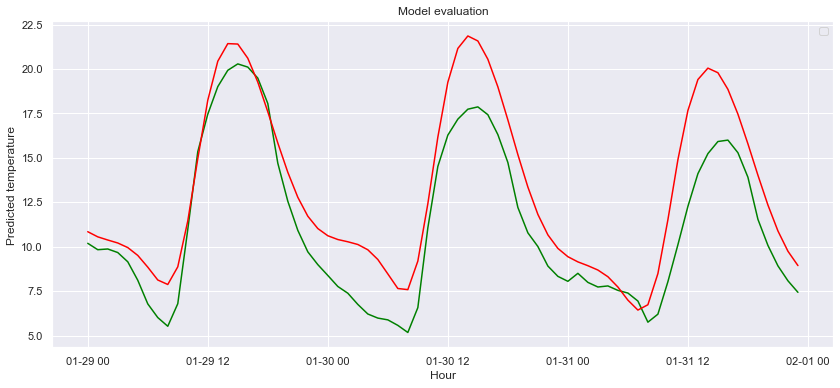

In [56]:
#fig = plt.figure()

x = dates
y = real
y1 = pred 

plt.plot(x,y, color = "green")
plt.plot(x,y1, color = "red")

plt.title("Model evaluation")
plt.xlabel("Hour")
plt.ylabel("Real temperature ")
plt.ylabel("Predicted temperature ")
plt.grid(True)
plt.legend()

In [57]:
dates

[Timestamp('2021-01-29 00:00:00'),
 Timestamp('2021-01-29 01:00:00'),
 Timestamp('2021-01-29 02:00:00'),
 Timestamp('2021-01-29 03:00:00'),
 Timestamp('2021-01-29 04:00:00'),
 Timestamp('2021-01-29 05:00:00'),
 Timestamp('2021-01-29 06:00:00'),
 Timestamp('2021-01-29 07:00:00'),
 Timestamp('2021-01-29 08:00:00'),
 Timestamp('2021-01-29 09:00:00'),
 Timestamp('2021-01-29 10:00:00'),
 Timestamp('2021-01-29 11:00:00'),
 Timestamp('2021-01-29 12:00:00'),
 Timestamp('2021-01-29 13:00:00'),
 Timestamp('2021-01-29 14:00:00'),
 Timestamp('2021-01-29 15:00:00'),
 Timestamp('2021-01-29 16:00:00'),
 Timestamp('2021-01-29 17:00:00'),
 Timestamp('2021-01-29 18:00:00'),
 Timestamp('2021-01-29 19:00:00'),
 Timestamp('2021-01-29 20:00:00'),
 Timestamp('2021-01-29 21:00:00'),
 Timestamp('2021-01-29 22:00:00'),
 Timestamp('2021-01-29 23:00:00'),
 Timestamp('2021-01-30 00:00:00'),
 Timestamp('2021-01-30 01:00:00'),
 Timestamp('2021-01-30 02:00:00'),
 Timestamp('2021-01-30 03:00:00'),
 Timestamp('2021-01-

In [58]:
evaluate_data = pd.DataFrame(data = {
    "Date":dates,
    "Predicted temperature":[x[0] for x in pred],
    "Real temperature": real
})
evaluate_data

Date  Predicted temperature  Real temperature
0  2021-01-29 00:00:00              10.844357         10.191218
1  2021-01-29 01:00:00              10.555150          9.831218
2  2021-01-29 02:00:00              10.376618          9.871218
3  2021-01-29 03:00:00              10.209259          9.671218
4  2021-01-29 04:00:00               9.951210          9.151218
5  2021-01-29 05:00:00               9.509420          8.111218
6  2021-01-29 06:00:00               8.848878          6.781218
7  2021-01-29 07:00:00               8.125937          6.011218
8  2021-01-29 08:00:00               7.872748          5.521218
9  2021-01-29 09:00:00               8.867510          6.791218
10 2021-01-29 10:00:00              11.447767         10.971218
11 2021-01-29 11:00:00              14.957535         15.351218
12 2021-01-29 12:00:00              18.246174         17.461220
13 2021-01-29 13:00:00              20.441982         19.011219
14 2021-01-29 14:00:00              21.432608         19.931220
15 2021-01-29 15:00:00              21.408716         20.291220
16 2021-01-29 16:00:00              20.610373         20.111220
17 2021-01-29 17:00:00              19.265411         19.491219
18 2021-01-29 18:00:00              17.595934         18.061218
19 2021-01-29 19:00:00              15.839427         14.701218
20 2021-01-29 20:00:00              14.189601         12.561218
21 2021-01-29 21:00:00              12.782678         10.921218
22 2021-01-29 22:00:00              11.716864          9.711218
23 2021-01-29 23:00:00              11.022141          8.991218
24 2021-01-30 00:00:00              10.617231          8.381218
25 2021-01-30 01:00:00              10.404436          7.761218
26 2021-01-30 02:00:00              10.277884          7.381218
27 2021-01-30 03:00:00              10.124953          6.751218
28 2021-01-30 04:00:00               9.827285          6.211218
29 2021-01-30 05:00:00               9.280494          5.981218
..                 ...                    ...               ...
42 2021-01-30 18:00:00              17.138920         14.741218
43 2021-01-30 19:00:00              15.185011         12.211218
44 2021-01-30 20:00:00              13.359502         10.781218
45 2021-01-30 21:00:00              11.819971         10.011218
46 2021-01-30 22:00:00              10.666533          8.911218
47 2021-01-30 23:00:00               9.905061          8.331218
48 2021-01-31 00:00:00               9.437305          8.051218
49 2021-01-31 01:00:00               9.145876          8.501218
50 2021-01-31 02:00:00               8.930655          7.991218
51 2021-01-31 03:00:00               8.686743          7.731218
52 2021-01-31 04:00:00               8.310726          7.791218
53 2021-01-31 05:00:00               7.730590          7.541218
54 2021-01-31 06:00:00               6.992390          7.391218
55 2021-01-31 07:00:00               6.432315          6.941218
56 2021-01-31 08:00:00               6.732135          5.751218
57 2021-01-31 09:00:00               8.486399          6.201218
58 2021-01-31 10:00:00              11.519154          8.031219
59 2021-01-31 11:00:00              14.898133         10.111218
60 2021-01-31 12:00:00              17.668106         12.271218
61 2021-01-31 13:00:00              19.411400         14.111218
62 2021-01-31 14:00:00              20.053236         15.241218
63 2021-01-31 15:00:00              19.793970         15.921218
64 2021-01-31 16:00:00              18.860191         16.001219
65 2021-01-31 17:00:00              17.462694         15.291218
66 2021-01-31 18:00:00              15.790425         13.911218
67 2021-01-31 19:00:00              14.023821         11.541218
68 2021-01-31 20:00:00              12.345180         10.071218
69 2021-01-31 21:00:00              10.887456          8.921218
70 2021-01-31 22:00:00               9.745477          8.081218
71 2021-01-31 23:00:00               8.937181          7.431218

[72 rows x 3 columns]